## Details:
* Date - The date of the observation.
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [63]:
%matplotlib inline
sns.set_theme(context = 'paper' , style = 'ticks' , palette = 'viridis' , font='sans-serif' , 
             font_scale = 1.3 , rc = {'figure.figsize' : [5 , 5]})

In [12]:
df = pd.read_csv('avocado.csv')
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [13]:
df.drop('Unnamed: 0' , axis = 'columns' , inplace = True)

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [17]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Univariate Analysis

#### Q1: check distribution of average price during Jan 2018


In [18]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [19]:
df['month'] = df['Date'].apply(lambda x : int(x.split('-')[1]))
df_jan_2018 = df[ (df['year'] == 2018) & (df['month'] == 1)]

In [20]:
df_jan_2018.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
8486,2018-01-28,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,conventional,2018,Albany,1
8487,2018-01-21,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,conventional,2018,Albany,1
8488,2018-01-14,1.42,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,conventional,2018,Albany,1
8489,2018-01-07,1.13,98540.22,2940.63,76192.61,42.63,19364.35,8633.09,10707.93,23.33,conventional,2018,Albany,1
8498,2018-01-28,1.08,559460.44,267126.26,37573.74,1661.80,253098.64,165156.60,83774.26,4167.78,conventional,2018,Atlanta,1


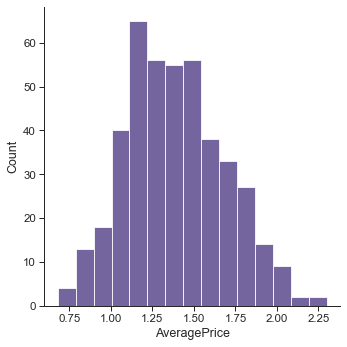

In [42]:
sns.displot(data = df_jan_2018 , x = 'AveragePrice')

#### Q2: using diffrent chart than you used in the previous one, plot the distribution for Jan 2018 Average price


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

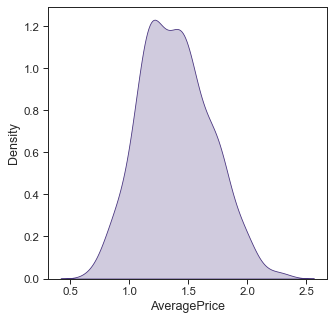

In [43]:
sns.kdeplot(data = df_jan_2018 , x = 'AveragePrice' , shade = True)

#### Q3: Create box-plot for the Average price, but this time for all the dataset, and comment your conclusion


<AxesSubplot:xlabel='AveragePrice'>

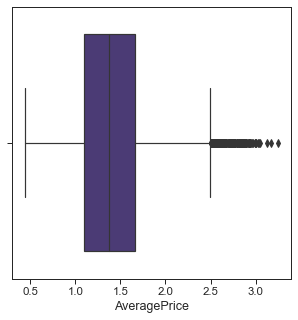

In [44]:
sns.boxplot(data = df , x = 'AveragePrice') 
# we find outlier value after point = 2.5

# Bi/Multivariate

#### Q4: Create a tracing boxplots (multiple box-plots in one figure) that shows the average price for each month and colored by year to distnguish between them

In [45]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

In [58]:
sns.set_theme(context = 'paper' , style = 'ticks' , palette = 'viridis' , font='sans-serif' , 
             font_scale = 1.3 ,rc = {'figure.figsize' : [10 , 5]})

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

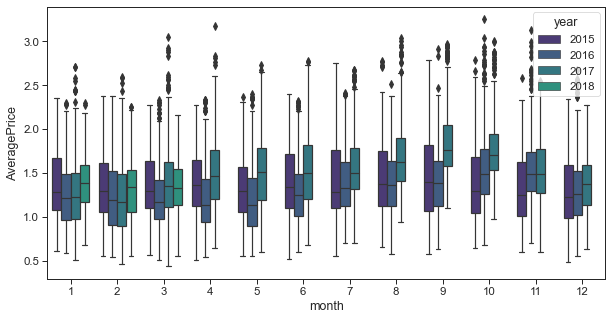

In [60]:
sns.boxplot( data = df , x = 'month' , y = 'AveragePrice' ,  hue = 'year')

#### Q5: compare between average prcies of diffrent types of producs


In [61]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12


<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

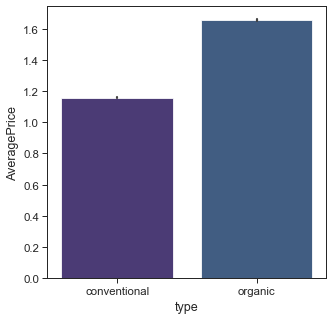

In [65]:
sns.barplot(data = df , x = 'type' , y = 'AveragePrice' , estimator = np.mean)

#### Q6:what are the top 10 best selling region with pandas and with a chart?

In [66]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12


In [67]:
df['selling'] = df['AveragePrice'] * df['Total Volume']

In [68]:
top10 = df.groupby('region')['selling'].sum().sort_values(ascending = False).head(10).index

In [69]:
top_10 = df[ df['region'].isin(top10)]

<AxesSubplot:xlabel='selling', ylabel='region'>

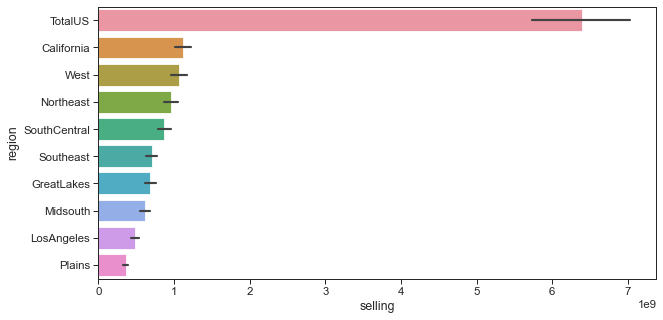

In [75]:
plt.figure(figsize = [10 , 5])
sns.barplot(data = top_10 , y = 'region' , x = 'selling' , estimator = sum , order = top10)

#### Q7 : Create multiple a heat map to compare between Average Price for each month for each year.


In [76]:
year_month = df.pivot_table(index = 'year' , columns = 'month' , values = 'AveragePrice')

<AxesSubplot:xlabel='month', ylabel='year'>

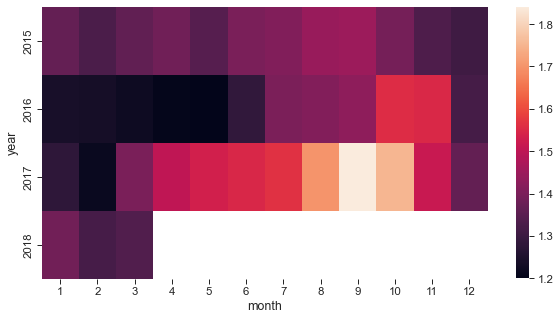

In [78]:
plt.figure(figsize = [10 , 5])
sns.heatmap(year_month)

#### Q9 : Create bar chart group for each year, reflects Average Price in each month 


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

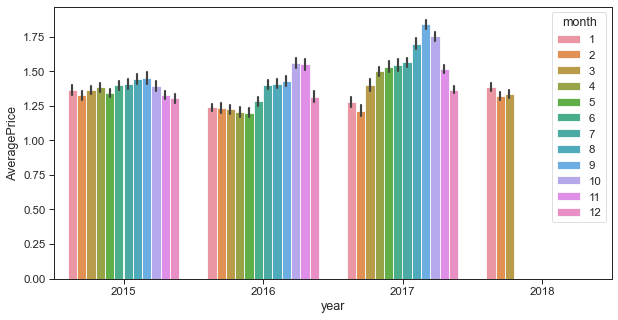

In [80]:
plt.figure(figsize = [10 , 5])
sns.barplot(data = df , x = 'year' , y = 'AveragePrice' , hue = 'month')

#### Create a new column for profit  

In [81]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,selling
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,109944.8046
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,85311.5220
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,65330.6880


In [82]:
df['selling']

0         85434.7046
1         74083.9230
2        109944.8046
3         85311.5220
4         65330.6880
            ...     
18244     27831.9729
18245     23748.5484
18246     25743.8412
18247     31276.0746
18248     28333.1196
Name: selling, Length: 18249, dtype: float64

#### what is the best selling Month

In [83]:
df.groupby('month')['selling'].sum().sort_values(ascending = False).head(1).index[0]

1

<AxesSubplot:xlabel='month', ylabel='selling'>

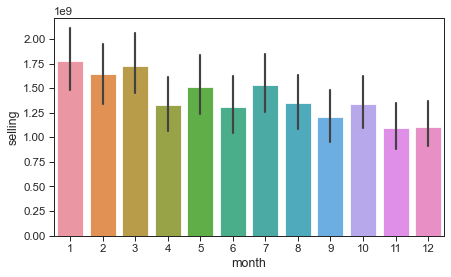

In [85]:
plt.figure(figsize = [7 , 4])
sns.barplot(data = df , x = 'month' , y = 'selling' , estimator = sum)

### For each month what is the most selling type

In [86]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,selling
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,109944.8046


In [87]:
group = df.groupby(['month' , 'type'])['selling'].sum()
group = group.to_frame()
group.reset_index(inplace = True)

<AxesSubplot:xlabel='month', ylabel='selling'>

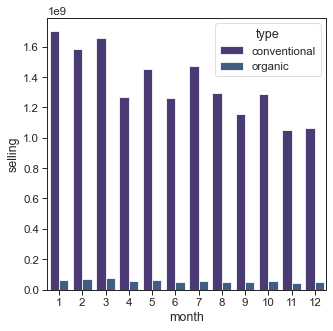

In [88]:
sns.barplot(data = group , x = 'month' ,  y = 'selling' , hue = 'type')